<a href="https://colab.research.google.com/github/anlianguzova/BI-stat-course-2022/blob/hw_lec_4_5/hw_lec_4_5/hw_lec_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from statsmodels.stats.weightstats import ztest

In [ ]:
data_path = "data"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [ ]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

In [ ]:
example_gene = "TMCC1"

<AxesSubplot: xlabel='TMCC1', ylabel='Density'>

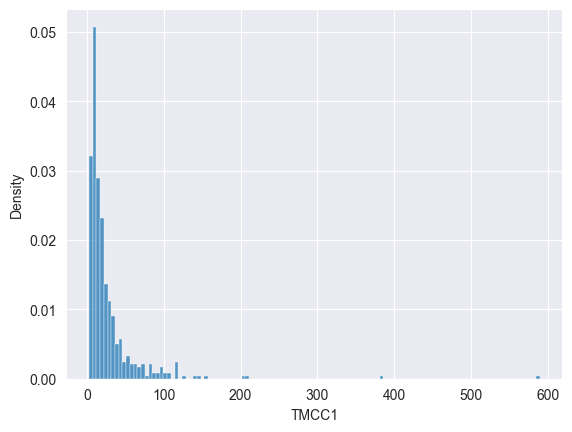

In [ ]:
sns.histplot(b_cells_expression_data[example_gene], stat="density")

<AxesSubplot: xlabel='TMCC1', ylabel='Density'>

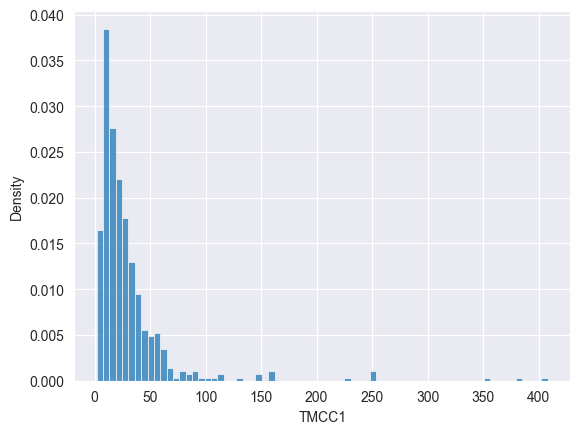

In [ ]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density")

### Задание 1

In [ ]:
def demonstrate_clt(expressions, sample_size: int = 1000, n_samples: int = 1000):
    randoms = np.array([
        np.random.choice(
            expressions, size=sample_size
        ) for _ in range(n_samples)
    ])
    mean_expressions = randoms.mean()
    return mean_expressions


In [ ]:
b_example = b_cells_expression_data[example_gene]
nk_example = nk_cells_expression_data[example_gene]

b_dem_res = demonstrate_clt(b_example)
nk_dem_res = demonstrate_clt(nk_example)
b_dem_res, nk_dem_res

(27.01063654876139, 30.482078729452194)

Среднее значение экспрессии гена TMCC1 различно у клеток разных типов (если прогнать функцию с увеличенными значениями sample_size и n_samples, то же самое будет).

In [ ]:
# Доверительный интервал для B-клеток
def calculate_ci(sample, mean_mean, std = None):
    if std is None:
      std = sample.std()

    se = std / np.sqrt(len(sample))
    left_b = mean_mean - 1.96 * se
    right_b = mean_mean + 1.96 * se

    return left_b, right_b

b_int = calculate_ci(b_example, b_dem_res)

b_int, b_dem_res

((23.460503102419324, 30.560769995103456), 27.01063654876139)

In [ ]:
# Доверительный интервал для NK клеток
nk_int = calculate_ci(nk_example, nk_dem_res)

nk_int, nk_dem_res

((26.9054939537629, 34.05866350514149), 30.482078729452194)

Доверительные интервалы пересекаются, среднее у обеих групп будут находиться внутри границ дов интервала, так что, видимо, никаких различий нет.

### Задание 2

In [ ]:
st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df = len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc = np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale = st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [ ]:
st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df = len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc = np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale = st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

In [ ]:
def check_intervals_intersect(first_ci: tuple, second_ci: tuple):
    are_intersect = False
    if (first_ci[1] > second_ci[0]) and (first_ci[0] < second_ci[1]):
        are_intersect = True
    return are_intersect


In [ ]:
def get_names(table):
    return table.columns[:-1].values

gene_names_exp = get_names(expression_data)

In [ ]:
def interval_95(table, length):
    ans = st.t.interval(confidence=0.95,
                        df=length - 1,
                        loc=np.mean(table),
                        scale=st.sem(table))
    return ans

def interval_to_tables(first_table, second_table):
    first_intervals = []
    second_intervals = []
    gene_names = get_names(first_table)
    for gene in gene_names:
        df_f_length = len(first_table[gene])
        first_int = interval_95(first_table[gene], df_f_length)
        first_intervals.append(first_int)
        df_s_length = len(second_table[gene])
        second_int = interval_95(second_table[gene], df_s_length)
        second_intervals.append(second_int)
    return first_intervals, second_intervals

def check_dge_with_ci(first_table, second_table):
    f_intervals, s_intervals = interval_to_tables(first_table, second_table)
    ci_test_results = []
    for f_int, s_int in zip(
        f_intervals, s_intervals
    ):
        ci_test_results.append(check_intervals_intersect(f_int, s_int))
    return ci_test_results



### Задание 3

In [ ]:
def check_dge_with_ztest(first_table, second_table, results=True, values=False):
    gene_names = get_names(first_table)
    z_stat_val = []
    for gene in gene_names:
        ans = ztest(
            first_table[gene],
            second_table[gene]
        )
        z_stat_val.append(ans)
    z_test_p_values = []
    for num in z_stat_val:
        z_test_p_values.append(num[1])
    z_test_results = []
    for val in z_test_p_values:
        if val < 0.05:
            z_test_results.append(True)
        else:
            z_test_results.append(False)
    if results:
        return z_test_results
    if values:
        return z_test_p_values

check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)